# Домашнее задание "Методология ведения DS-проектов"
Dmitry Balynin AML-24

## 1. Бизнес-анализ
#### 1.1 Цель задачи
Предсказание качества вина на основании его физико-химических характеристик

#### 1.2 Доступные данные
На основании описания датасета на сайте Kaggle (см. ссылку выше), а также других открытых источников становится понятно, что текущий набор данных содержит информацию только о физико-химических характеристиках Португальских белых и красных вин Vinho Verde, полученных путем проведения различных лабораторных измерений и тестов. Также для каждого вина представлена информация о его типе (белое или красное) и о том, какую оценку по десятибалльной шкале вино получило от сомелье.
Каждый из измеренных в лаборатории параметров так или иначе влияет на вкусовые, цветовые и другие характеристики вин.
Степень влияния каждого из признаков может быть оценена в последующем анализе данных.
В описании к датасету также особо отмечено, что данные в выборке не являются нормализованными. Значительная часть вин, описанных в датасете, относится к винам среднего качества, а вина плохого или высшего качества встречаются в выборке редко. Это уточнение важно учесть при анализе выбросов в данных, которые с большой долей вероятности могут оказаться не выбросами, а значимыми данными.
Также в описании данных указано, что все представленные данные являются релевантными, и поэтому интересными для анализа могут оказаться методы отбора признаков.

#### 1.3 Признаки датасета
0. type (тип вина: красное или белое)
1. fixed acidity (фиксированная кислотность)
2. volatile acidity (летучая кислотность)
3. citric acid (лимонная кислота)
4. residual sugar (остаточный сахар)
5. chlorides (хлориды)
6. free sulfur dioxide (свободный диоксид серы)
7. total sulfur dioxide (суммарный диоксид серы)
8. density (плотность)
9. pH (pH)
10. sulphates (сульфаты)
11. alcohol (алкоголь)  

Выходные данные:  
12. quality (score between 0 and 10) (качество: баллы от 0 до 10)

#### Дополнительные комментарии:
* Кстати помимо задачи классификации вин по качеству можно попытаться предсказать и тип вина (красное или белое).
** После знакомства вот с [таким анализом](https://www.kaggle.com/code/mgmarques/wines-type-and-quality-classification-exercises/notebook) легко развивается комплекс неполноценности


## 2. Анализ данных

## 2.1 Импортируем библиотеки

In [20]:

import pandas as pd
import numpy as np

import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 2.2 Загружаем данные

In [21]:
from google.colab import files
uploaded = files.upload()

Saving winequalityN.csv to winequalityN (1).csv


In [22]:
data = pd.read_csv('winequalityN.csv')

#### 2.3 Анализируем состав параметров и их основные метрики

Видим, что колонку с типом вина будет правильно преобразовать в int, видим у некоторых колонок пропуски.

Общее количество строк в датасете - 6497

In [23]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### 2.4 Считаем пропуски
Посчитаем пропуски и учтем эту информацию на следующем этапе подготовки данных:

In [24]:
def count_nans(df, col_name):
    return len(df[pd.isnull(df[col_name])])

for col in data.columns:
    empty_vals = count_nans(data, col)
    if empty_vals > 0:
        print(f'Колонка {col} содержит {empty_vals} пустых строк')

Колонка fixed acidity содержит 10 пустых строк
Колонка volatile acidity содержит 8 пустых строк
Колонка citric acid содержит 3 пустых строк
Колонка residual sugar содержит 2 пустых строк
Колонка chlorides содержит 2 пустых строк
Колонка pH содержит 9 пустых строк
Колонка sulphates содержит 4 пустых строк


#### 2.5 Смотрим распределение целевого параметра
Действительно, как и было указано в описании датасета, количество вин низкого и высокого качества незначительно по сравнению с количеством вин среднего качества. Оценки 0, 1, 2 и 10 отсутствуют совсем.

In [25]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### 2.6 Тепловая карта параметров включая целевую переменную
На этой диаграмме видно, что наибольшее влияние на качество вин оказывают уровень алкоголя и плотность (alcohol - density). При этом видно, что между этими двумя параметрами довольно высок уровень отрицательной корреляции.
Также заметно влияние на качество вина, субъективно оцениваемое сомелье, еще двух параметров - летучая кислотность и хлориды (volatile acidity - chlorides).  
Параметров, которые можно было бы считать совершенно не значимыми, в данных не видно, минимальный коэффициент корреляции 0.019 наблюдается с уровнем pH

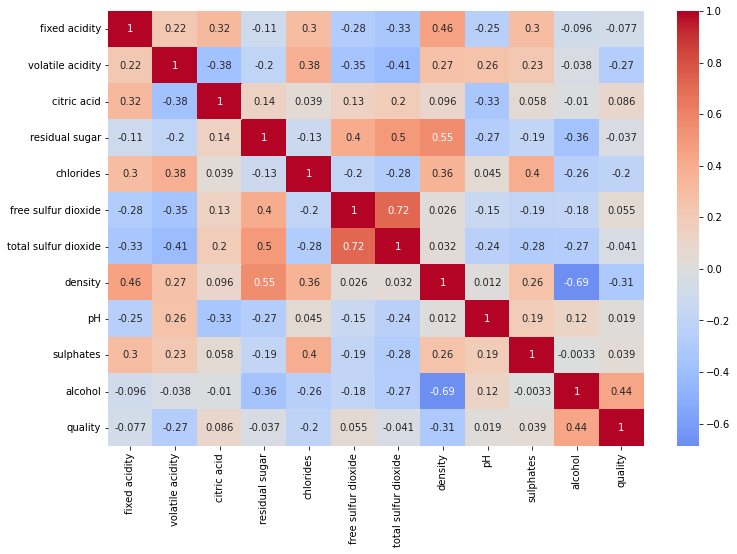

In [26]:
df = data.copy().drop(["type"], axis=1)
sns.heatmap(df.corr(), annot = True, center= 0, cmap= 'coolwarm')

#### 2.7 Использование boxplot для анализа влияния отдельных параметров на целевой параметр
Проверим влияние нескольких параметров на целевой параметр на основании данных, полученных с помощью тепловой карты.  
Вначале - влияние двух значимых параметров, потом - одного не значимого.

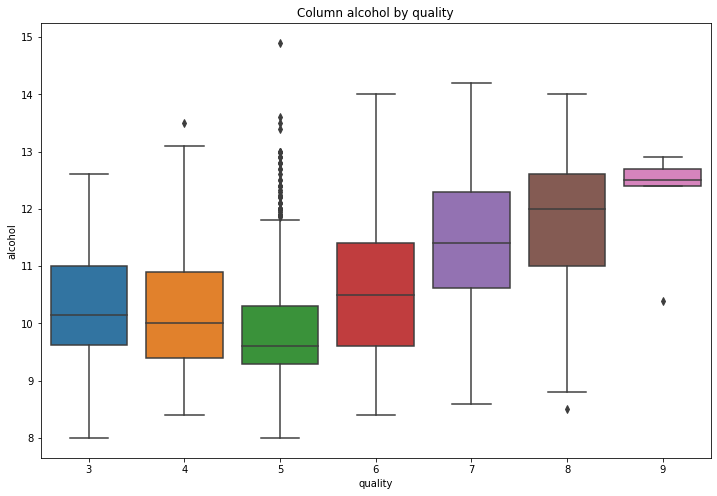

In [27]:
# alcogol
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Column alcohol by quality')
sns.boxplot(y=data['alcohol'], x=data['quality'])

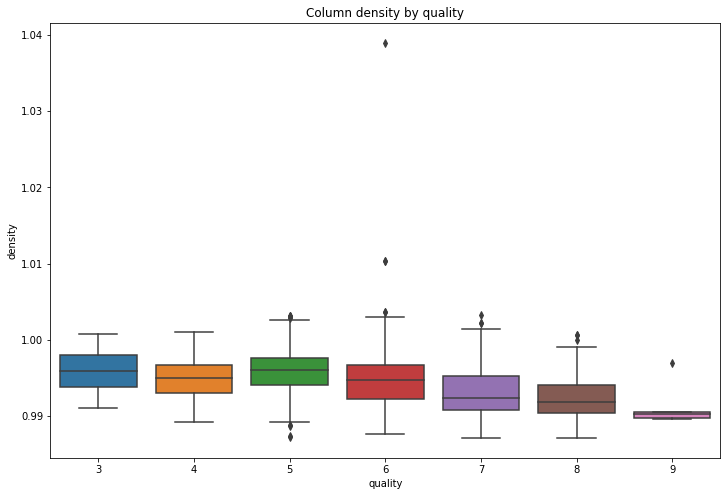

In [28]:
# density
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Column density by quality')
sns.boxplot(y=data['density'], x=data['quality'])

# На этой диаграмме видны предположительные выбросы для вина, имеющего оценку 6

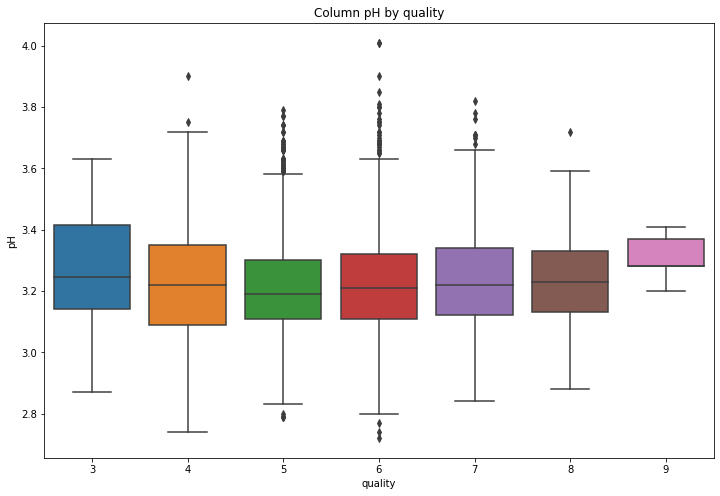

In [29]:
# density
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Column pH by quality')
sns.boxplot(y=data['pH'], x=data['quality'])


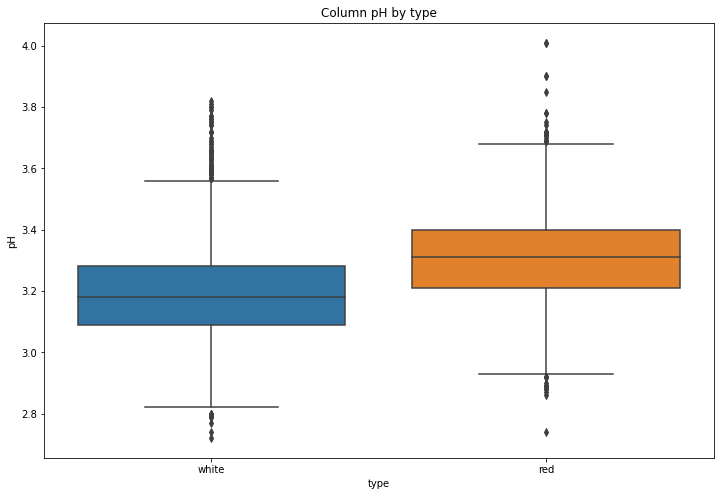

In [30]:
# Еще один эксперимент - смотрим, как связаны тип вина и pH (похоже, связь сильная)
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Column pH by type')
sns.boxplot(y=data['pH'], x=data['type'])

## 3. Подготовка данных

#### 3.1 Преобразование категориальной переменной type
Создаем копию исходного датафрейма (для наглядности и не уделяя должного внимания экономии памяти)

In [31]:
type = pd.Series(np.where(data.type == 'red', 1, 0), name='Type')
data_1 = data.copy()
data_1.type = type
data_1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 3.2 Разбираемся с пропусками

In [32]:
Frames = []
for col in data_1.columns:
    #print(data[pd.isnull(data[col])])
    #df_strings_with_nans.append(data[pd.isnull(data[col])], ignore_index = True)
    Frames.append(data_1[pd.isnull(data_1[col])])
df_strings_with_nans = pd.concat(Frames)
print(f'Количество строк с пропусками: {df_strings_with_nans.quality.count()}')
df_res = df_strings_with_nans.drop_duplicates(keep='first')
df_res.quality.value_counts()

# Учитывая неравномерность выборки и с одной стороны ее достаточно большой объем, а с другой стороны - 
# малое количество вин с высоким и низким качеством, для нас идеальным будет, если пропуски окажутся 
# у вин среднего качества. Тогда такие строки можно просто удалить.


Количество строк с пропусками: 38


6    16
5    10
7     5
4     2
8     1
Name: quality, dtype: int64

In [33]:
# Так и получилось. Удалим спокойно такие строки и проверим параметры:
data_2 = data_1.copy().dropna()
data_2.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.246480,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### 3.3 Выбросы
При просмотре некоторых ящиков с усами были замечены кандидаты на выбросы.

Можно применить метод анализа с помощью z-индекса (отношение реального отклонения величины к среднеквадратичному отклонению)

Можно считать потенциальным выбросом параметр, для которого z-индекс превышает по модулю 3.5 (обычно берут 3, но можно немного расширить диапазон)

Точно так же можно использовать вместо z-индекса и какой-то иной критерий проверки.

При этом кажется разумным искать выбросы для каждого параметра не по всей выборке "оптом", а отдельно для каждого целевого значения.


In [34]:
# используем библиотеку stats
import scipy.stats as stats

# создаем копию датасета
data_3 = data_2.copy()

# получаем справочник категории Качество (наша целевая переменная quality)
qualities = data_3.quality.unique()

# создаем шаблон колонки с нулями
zeros_col = pd.Series(np.zeros((data_3.shape[0]))).astype("Int64")  

# добавляем колонку, где будем считать выбросы
data_3['outlies'] = zeros_col

# в первом цикле перебираем колонки
for col in data_3.columns[0:-2]:
    # добавляем колонку для фиксации выброса по текущей колонке с данными
    data_3[col + '_'] = zeros_col
    
    # воторой цикл - перебираем типы стекла и для каждого из них считаем z-индексы в текущей колонке
    for qual in qualities:
        data_3.loc[(data_3.quality == qual), col + '_'] = \
            ((data_3.loc[(data_3.quality == qual)][col] - data_3.loc[(data_3.quality == qual)][col].mean())/
             data_3.loc[(data_3.quality == qual)][col].std()).apply(lambda x: 1 if np.abs(x)>3.5 else 0)

    # добавляем выбросы по текущей колонке к колонке, суммирующей выбросы по каждой строке
    data_3['outlies'] = data_3['outlies'] + data_3[col+'_']
    
# смотрим, что получается, сразу оставляя только строки, в которых есть хотя бы один выброс    
outlies_data = data_3[(data_3.outlies > 0)]
outlies_data.outlies.value_counts()

# Мы видим, что у нас есть одно вино, для которого выбросы зафиксированы на уровне 4 параметров,
# 10 вин с 3 параметрами с выбросами и 58 вин с двумя выбросами.

1    262
2     33
3      2
Name: outlies, dtype: Int64

#### 3.4 Удаляем выбросы и формируем выборки X и y

In [35]:
# Разделяем данные. Считаем выбросами только те колонки, в которых как минимум по двум параметрам фиксируется выброс.
X = data_3[(data_3.outlies < 2)].iloc[:, 0:-14]
y = data_3[(data_3.outlies < 2)].iloc[:, -14]
print(f'Исходная длина датасета {data.shape[0]}, длина после чистки {X.shape[0]} или {100*X.shape[0]/data.shape[0]}%')
X.head()

# В результате удалено примерно 1.5 процента исходных данных. Возможно, это - ошибочное решение. Время покажет.

Исходная длина датасета 6497, длина после чистки 6396 или 98.44543635524089%


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


#### 3.5 Мультиколлинеарность
Теоретически можно было бы также провести эксперименты с удалением пары столбцов, значения в которых имеют заметную корреляцию с другими столбцами, имея при этом мЕньшую корреляцию с целевой переменной.
Выбор таких столбцов может быть основан на анализе тепловой карты
Так, из пары 'residual sugar' и 'density' можно попробовать убрать из датасета колонку 'residual sugar'
а из пары 'chlorides' 'sulphates' убрать 'chlorides'

#### 3.6 Нормализация данных
При использовании логистической регрессии будет рациональным предварительно нормализовать данные по параметрам.
Так и поступим.

In [36]:
from sklearn.preprocessing import MinMaxScaler
MMScaler = MinMaxScaler()
X_scale = MMScaler.fit_transform(X)


## 4. Моделирование
Для моделирования используем логистическую регрессию.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [39]:
# Создаем модель и обучаем ее
lite_model = LogisticRegression(max_iter=500)
lite_model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

## 5. Оценка решения

#### 5.1 Предсказываем и сравниваем предсказание и реальность

In [40]:
# Предсказываем:
predictions = lite_model.predict(X_test)

# Сравним первые 40 значений. Не забываем, что 1 - пассажир выжил, 0 - нет.
print(f'Предсказание (первые 40 из тестовой части выборки):\n{pd.Series(predictions[0:40]).to_list()}')
print(f'А на самом деле:\n{y_test[0:40].to_list()}')

Предсказание (первые 40 из тестовой части выборки):
[6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6]
А на самом деле:
[6, 5, 5, 5, 5, 7, 8, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 7, 5, 6, 7, 7, 7, 6, 5, 8, 6, 5, 5, 7, 5, 7, 6, 7, 6, 5, 6, 7, 6]


#### 5.2 Смотрим метрики для тренировочных и тестовых данных

In [41]:
print(lite_model.score(X_train, y_train), lite_model.score(X_test, y_test))

0.5431978107896794 0.553125


#### 5.3 Принятие решения об изменении алгоритмов подготовки данных
В данном случае полученные оценки (метрики) для получившейся модели кажутся крайне низкими, и конечно возникает естественное желание изменить либо технологию подготовки данных, либо использовать другие модели для предсказаний.
В этой связи при нормальном подходе на данном этапе, в прямом соответствии с моделью CrispDM, следовало бы вернуться к началу цикла.

## 6. Внедрение
Поскольку в качестве задания выбран датасет из Kaggle, внедрением можно считать получение предсказания на основе построенной модели и его публикация в общей таблице результатов этой платформы.

In [42]:
result = lite_model.predict(X_test)
result
# Поскольку для этого задания на kaggle тестовый датасет не задан, 
# решением, очевидно, является обученная модель и ее метрики. 
# Учитывая то, что среди решений опубликованы варианты с точностью предсказания более 99%,
# мне с моим 55-процентным результатом есть куда расти :)

array([6, 6, 5, ..., 6, 6, 5])

# Отчет
## В работе исследованы следующие этапы:

## Бизнес анализ
- поставлены цели задачи. Предсказание качества вина на основании его физико-химических характеристик.
- найдены доступные данные. На основании описания датасета на сайте Kaggle (см. ссылку выше), а также других открытых источников становится понятно, что текущий набор данных содержит информацию только о физико-химических характеристиках Португальских белых и красных вин Vinho Verde, полученных путем проведения различных лабораторных измерений и тестов.
- определены признаки датасета

## Анализ данных

- пронализирован состав параметров и их основные метрики
- просчитаны пропуски пропуски
- определено распределение целевого параметра
- составлена тепловая карта параметров включая целевую переменную
На этой диаграмме видно, что наибольшее влияние на качество вин оказывают уровень алкоголя и плотность (alcohol - density)
- использован boxplot для анализа влияния отдельных параметров на целевой параметр

## Подготовка данных

- преобразование категориальной переменной type
- произведена работа с пропусками
- определены  выбросы
- удалены выбросы и сформированы выборки X и y
- Нормализованы  данные при помощи MinMaxScaler

## Моделирование

- для моделирования используем логистическую регрессию

## Оценка решения

- сравниваем предсказание и реальность
- определены метрики для тренировочных и тестовых данных

## Внедрение
- покольку в качестве задания выбран датасет из Kaggle, внедрением можно считать получение предсказания на основе построенной модели и его публикация в общей таблице результатов этой платформы.